Stock Portfolio Visualization
Scenario: You have daily closing prices and trading volumes for 4 stocks over 10 days.
Tasks:

Line plot: Plot closing prices for all stocks with different line styles.

Bar plot: Plot trading volume per stock on day 5.

Error bars: Add ±2% error bars to price plots.

Stacked area plot: Show cumulative portfolio value over 10 days.

Annotations: Highlight the day with the maximum portfolio value.

Subplots: Create a 2x1 subplot figure: top = price trends, bottom = volume bar chart.

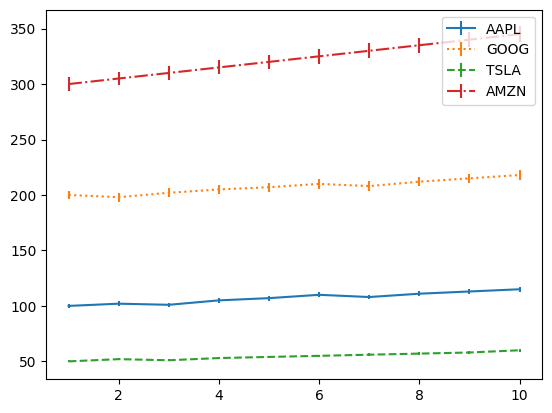

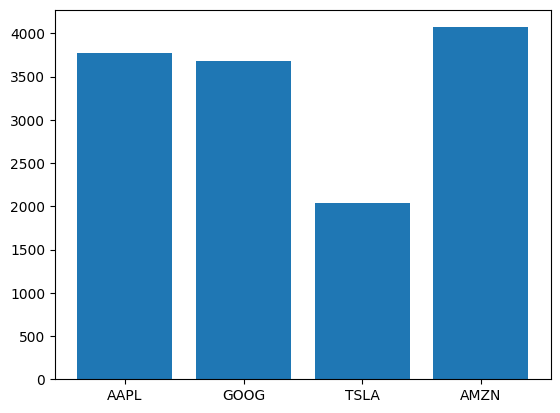

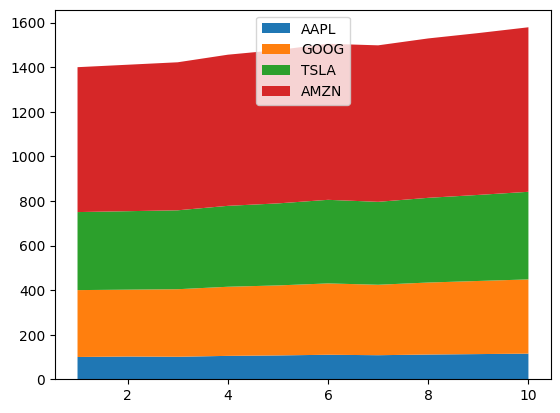

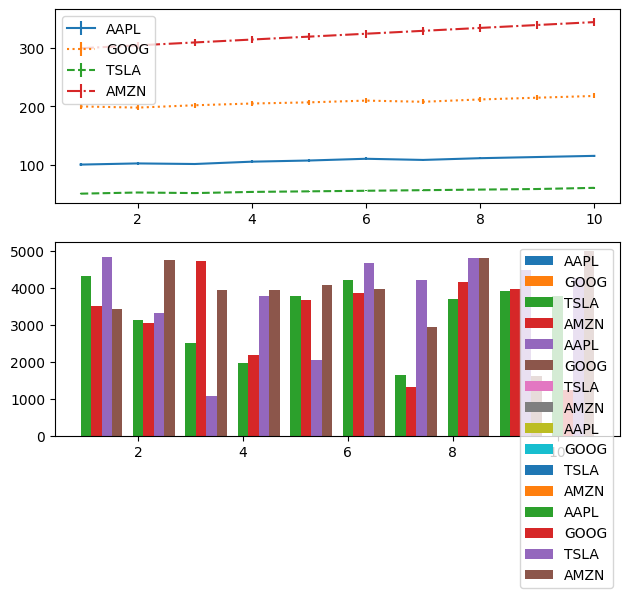

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data
days = np.arange(1, 11)
stocks = ["AAPL", "GOOG", "TSLA", "AMZN"]

prices = np.array([
    [100, 200, 50, 300],
    [102, 198, 52, 305],
    [101, 202, 51, 310],
    [105, 205, 53, 315],
    [107, 207, 54, 320],
    [110, 210, 55, 325],
    [108, 208, 56, 330],
    [111, 212, 57, 335],
    [113, 215, 58, 340],
    [115, 218, 60, 345]
])

volumes = np.random.randint(1000, 5000, size=(10,4))

class StockDashboard:
  def __init__(self, days, prices, volumes, stocks):
    self.days = days
    self.prices = prices
    self.volumes = volumes
    self.stocks = stocks

  def plot_prices(self):
    line_styles = ['-',':','--','-.']
    for i, stock in enumerate(self.stocks):
      plt.errorbar(self.days, self.prices[:,i], yerr=0.02*self.prices[:,i],
                   label=stock, linestyle=line_styles[i])
    plt.xlabel=('Day')
    plt.ylabel=("Price")
    plt.legend()
    plt.show()


  def plot_volume_bar_day5(self):
    day_index = 4
    plt.bar(self.stocks, self.volumes[day_index,:])
    plt.show()

  def plot_stacked_portfolio(self):
    cumulative_values = np.cumsum(self.prices, axis=1)
    plt.stackplot(self.days, cumulative_values[:,0], cumulative_values[:,1],
                  cumulative_values[:,2], cumulative_values[:,3], labels=self.stocks)
    plt.legend()
    plt.show()

  def plot_subplots(self):
    fig, axs = plt.subplots(2,1)
    line_styles = ['-',':','--','-.']
    for i, stock in enumerate(self.stocks):
      axs[0].errorbar(self.days, self.prices[:,i], yerr=0.02*self.prices[:,i],
                      label=stock, linestyle=line_styles[i])
      axs[0].legend()

      width = 0.2
      for i, stock in enumerate(self.stocks):
        axs[1].bar(self.days+i*width, self.volumes[:,i], width=width, label=stock)

    plt.tight_layout()
    axs[1].legend()
    plt.show()    


dashboard = StockDashboard(days, prices, volumes, stocks)
dashboard.plot_prices()
dashboard.plot_volume_bar_day5()
dashboard.plot_stacked_portfolio()
dashboard.plot_subplots()

Multi-Metric Weather Dashboard (Single City)

Scenario:
You have hourly weather data for one city over 24 hours: temperature, humidity, wind speed, and rainfall. Your task is to create a dashboard visualization using Matplotlib to analyze the city’s weather metrics.

Tasks:

Generate the Data:

Create hourly data for 24 hours:

Temperature: values around 20°C, with some daily variation (e.g., using sin function + noise).

Humidity: values around 50%, with some daily variation (e.g., using cos function + noise).

Wind Speed: random values between 5–20 km/h.

Rainfall: random integer values (e.g., 0–5 mm) or Poisson distribution.

Should write the code to generate these arrays themselves.

Line Plot:

Plot temperature over 24 hours.

Include ±5% error bars.

Highlight the maximum temperature with an annotation.

Scatter Plot:

Plot humidity vs temperature.

Use alpha transparency for clarity.

Bar Plot:

Plot wind speed at hours 6, 12, and 18.

Stacked Area Plot:

Show cumulative rainfall over 24 hours.

Highlight the hour with maximum rainfall.

Subplots Dashboard:

Create a 2x2 subplot layout:

Top-left: Temperature line plot with error bars

Top-right: Humidity scatter plot

Bottom-left: Wind speed bar plot

Bottom-right: Rainfall stacked area plot

Normalization:

Create a normalized version of temperature and plot it in a separate figure.

Encapsulation:

Wrap your plotting code into a class WeatherDashboard.

Include methods for each plot and the dashboard.

Plot a 3D surface of temperature vs humidity vs hour for the city.

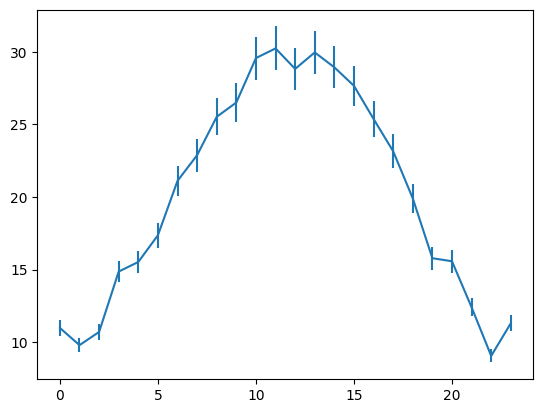

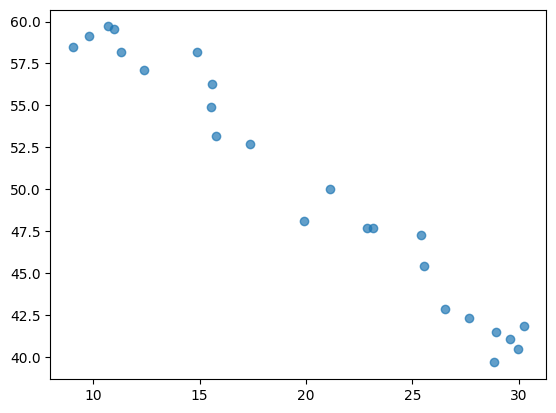

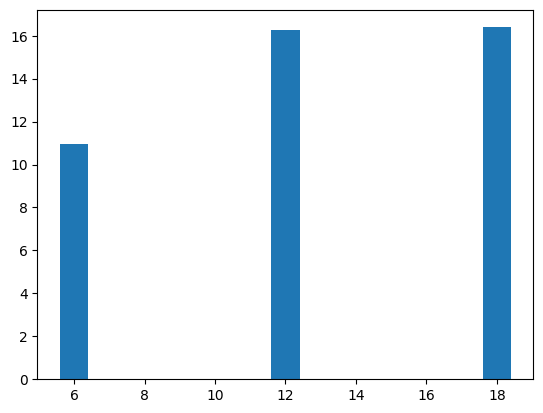

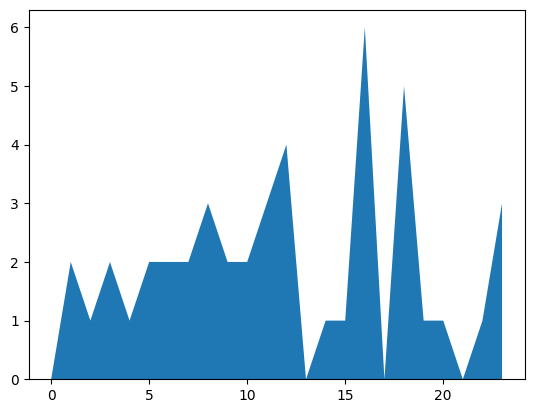

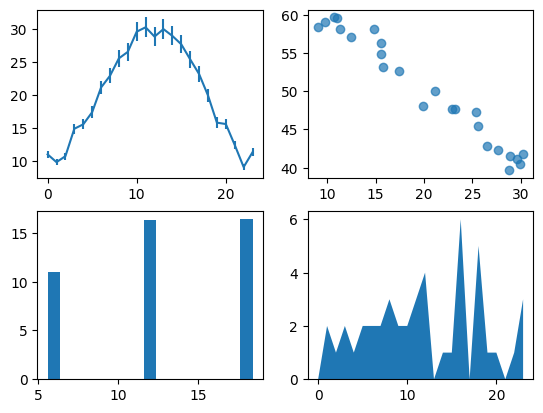

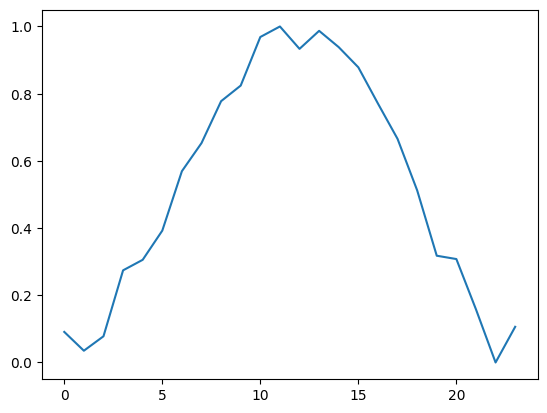

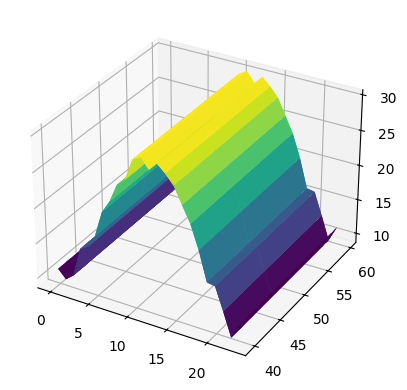

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

hours = np.arange(0, 24)

temperature = 20 + 10 * np.sin((hours-6)/24 * 2 * np.pi) + np.random.randn(24)
humidity = 50 - 10 * np.sin((hours-6)/24 * 2 * np.pi) + np.random.randn(24)
wind_speed = np.random.uniform(5,20,size=24)
rainfall = np.random.poisson(2,size=24)

class WeatherDashboard:
  def __init__(self, hours, temperature, humidity, wind_speed, rainfall):
    self.hours = hours
    self.temperature = temperature
    self.humidity = humidity
    self.wind_speed = wind_speed
    self.rainfall = rainfall


  def plot_temperature(self):
    plt.errorbar(self.hours, self.temperature,yerr=0.05*self.temperature)
    plt.show()


  def plot_humidity_scatter(self):
    plt.scatter(self.temperature, self.humidity, alpha=0.7)
    plt.show()


  def plot_wind_bar(self):
    hours_list = [6, 12, 18]
    plt.bar(hours_list, self.wind_speed[hours_list])
    plt.show()



  def plot_rainfall_area(self):
    plt.stackplot(self.hours, self.rainfall)
    plt.show()


  def plot_subplots_dashboard(self):
    fig, axis = plt.subplots(2,2)
    axis[0,0].errorbar(self.hours, self.temperature,yerr=0.05*self.temperature)
    axis[0,1].scatter(self.temperature, self.humidity, alpha=0.7)
    hours_list = [6, 12, 18]
    axis[1,0].bar(hours_list, self.wind_speed[hours_list])
    axis[1,1].stackplot(self.hours, self.rainfall)
    
    plt.show()

  def plot_normalized_temperature(self):
    temp_norm = (self.temperature-np.min(self.temperature))/(np.max(self.temperature)-np.min(self.temperature))
    plt.plot(self.hours, temp_norm)
    plt.show()


  def plot_3d_surface(self):
    X,Y = np.meshgrid(self.hours, self.humidity)
    Z = np.tile(self.temperature, (24,1))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X,Y,Z, cmap='viridis')
    plt.show()

dashboard = WeatherDashboard(hours, temperature, humidity, wind_speed, rainfall)
dashboard.plot_temperature()
dashboard.plot_humidity_scatter()
dashboard.plot_wind_bar()
dashboard.plot_rainfall_area()
dashboard.plot_subplots_dashboard()
dashboard.plot_normalized_temperature()
dashboard.plot_3d_surface()